In [1]:
# Colab filesystem
from google.colab import files 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os # File system utils
from tensorflow.keras.preprocessing import image # Load images
import matplotlib.pyplot as plt # For charts
import random # Random library

from IPython.display import clear_output # clear cell for output
from IPython import display # display interface

In [3]:
# Unpack files
!unzip -q -o '/content/drive/MyDrive/archive.zip' -d /content
# !unzip -q -o '/content/drive/MyDrive/classification.zip' -d /content

In [4]:
TRAIN_PATH  = '/content/train'  # Our source files
# A list of class names
CLASS_LIST = sorted(os.listdir(TRAIN_PATH)) # Assign number for each class by sorting the set of classes
# Number of classes
CLASS_COUNT = len(CLASS_LIST)

In [5]:
# Look at dirs for each class
for i in range(CLASS_COUNT):  # For each class show NUM_IMAGES
  class_path = TRAIN_PATH + '/' + CLASS_LIST[i]                                            
  images_list = os.listdir(class_path)
  print(f'Class \'{CLASS_LIST[i]}\'\t: files : {len(images_list)}')

Class 'bag'	: files : 4939
Class 'bal'	: files : 8496
Class 'ban'	: files : 2737
Class 'bea'	: files : 7719
Class 'can'	: files : 9455
Class 'env'	: files : 2093
Class 'gbt'	: files : 2817
Class 'mon'	: files : 8209
Class 'pbt'	: files : 8225
Class 'toy'	: files : 20102


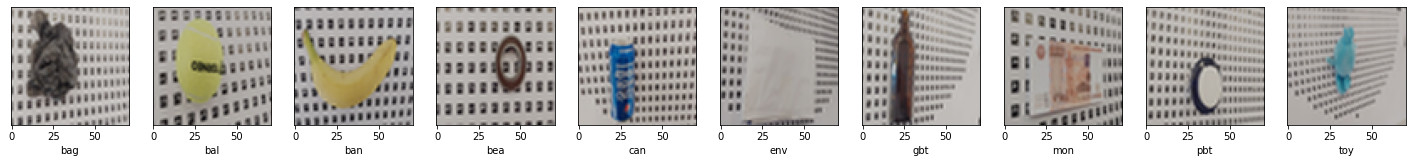

In [6]:
# Look at images from each class
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))                   
for i in range(CLASS_COUNT):  # For each class show NUM_IMAGES
  class_path = TRAIN_PATH + '/' + CLASS_LIST[i]                                            
  images_list = os.listdir(class_path)
  image_path = class_path + '/' + random.choice(images_list)
  axs[i].imshow(image.load_img(image_path, target_size=(71, 71)))
  # axs[i].get_xaxis().set_visible(False) # hide axis x
  axs[i].get_yaxis().set_visible(False) # hide axis y
  axs[i].set_xlabel(CLASS_LIST[i])

plt.show()

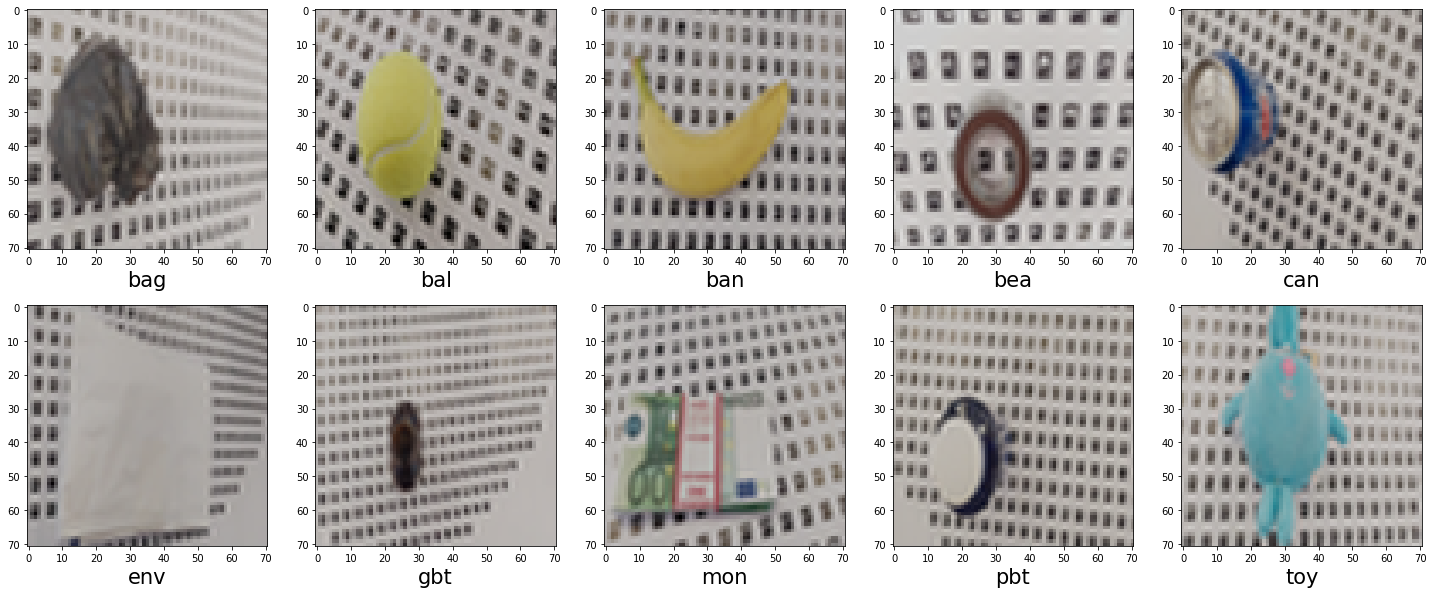

In [7]:
FILES_COUNT = 60  # how frames we get
FILES_STEP  = 20  # size of step between files 

# show and save frames for video
for file_id in range(FILES_COUNT): # for each file as a new frame 
  plt.figure(figsize=(25, 10)) # set size of the figure
  for class_id in range(CLASS_COUNT): # for each class
      class_path = TRAIN_PATH + '/' + CLASS_LIST[class_id] # path for current class                                           
      file_list = sorted(os.listdir(class_path)) # sorted list of images in the current class
      file_list = file_list[::FILES_STEP] # skip some files between frames
      image_path = class_path + '/' + file_list[file_id] # take path for current chosen file in the sequence of frames for video
      ax = plt.subplot(2, 5, class_id + 1) # draw space for axis
      plt.imshow(image.load_img(image_path, target_size=(71, 71))) # draw image in original size
      # ax.get_xaxis().set_visible(False) # hide axis x
      # ax.get_yaxis().set_visible(False) # hide axis y
      ax.set_xlabel(CLASS_LIST[class_id], fontsize=21)
  clear_output(wait=True) # clear cell for output
  plt.savefig('image'+str(file_id)+'.jpg') # save ready figure to the file
  plt.show() # output

In [8]:
import imageio # Library imageio
images = [] # Empty list for gif

for i in range(FILES_COUNT): # for each frame
    images.append(imageio.imread('image'+str(i)+'.jpg')) # Add next image in the list
imageio.mimsave('Classification.gif', images) # .mimsave() saves the animation

In [9]:
# from IPython.display import Image # Image library to draw image
# Image(open('Classification.gif','rb').read()) # Show the animation